# OUR REPORT

## EDA
> "Write an EDA section in your technical report. Report the results of the initial models and include figures or tables that show the target variable and its relationship with potentially significant predictors."


To begin, we transformed the shares target variable using a logarithmic scale. The original distribution of shares was highly skewed to the left. By applying the logarithm, we achieved a distribution closer to normal. Therefore, we used the log-transformed shares as our target variable throughout the lab. We converted categorical data into quantitative values using the pd.get_dummies function, and we dropped the first dummy column for each categorical variable to avoid multicollinearity. Our initial linear regression model yielded an R² value of 0.023, indicating that the model explains only about 2% of the variance in the training data. From this model, the most important features identified were:

- n_tokens_title
- num_hrefs
- average_token_length
- data_channel_is_entertainment
- kw_min_avg
- kw_max_avg
- kw_avg_avg
- self_reference_min_shares 
- global_subjectivity

When using a tree regression model, the top five important features were:

n_tokens_title

n_tokens_content

n_unique_tokens

n_non_stop_words

n_non_stop_unique_tokens

Analyzing the heat map or correlation matrix, we observed that none of the important features had a strong correlation with the target variable. The highest correlation was 0.11 for kw_avg_avg. Given the low correlations, transforming the data further or exploring feature interactions may help improve the model's predictive power.

** To avoid notebook crashing, we will refrain from using more images **

![Screenshot 2024-12-11 at 12.26.33 PM.png](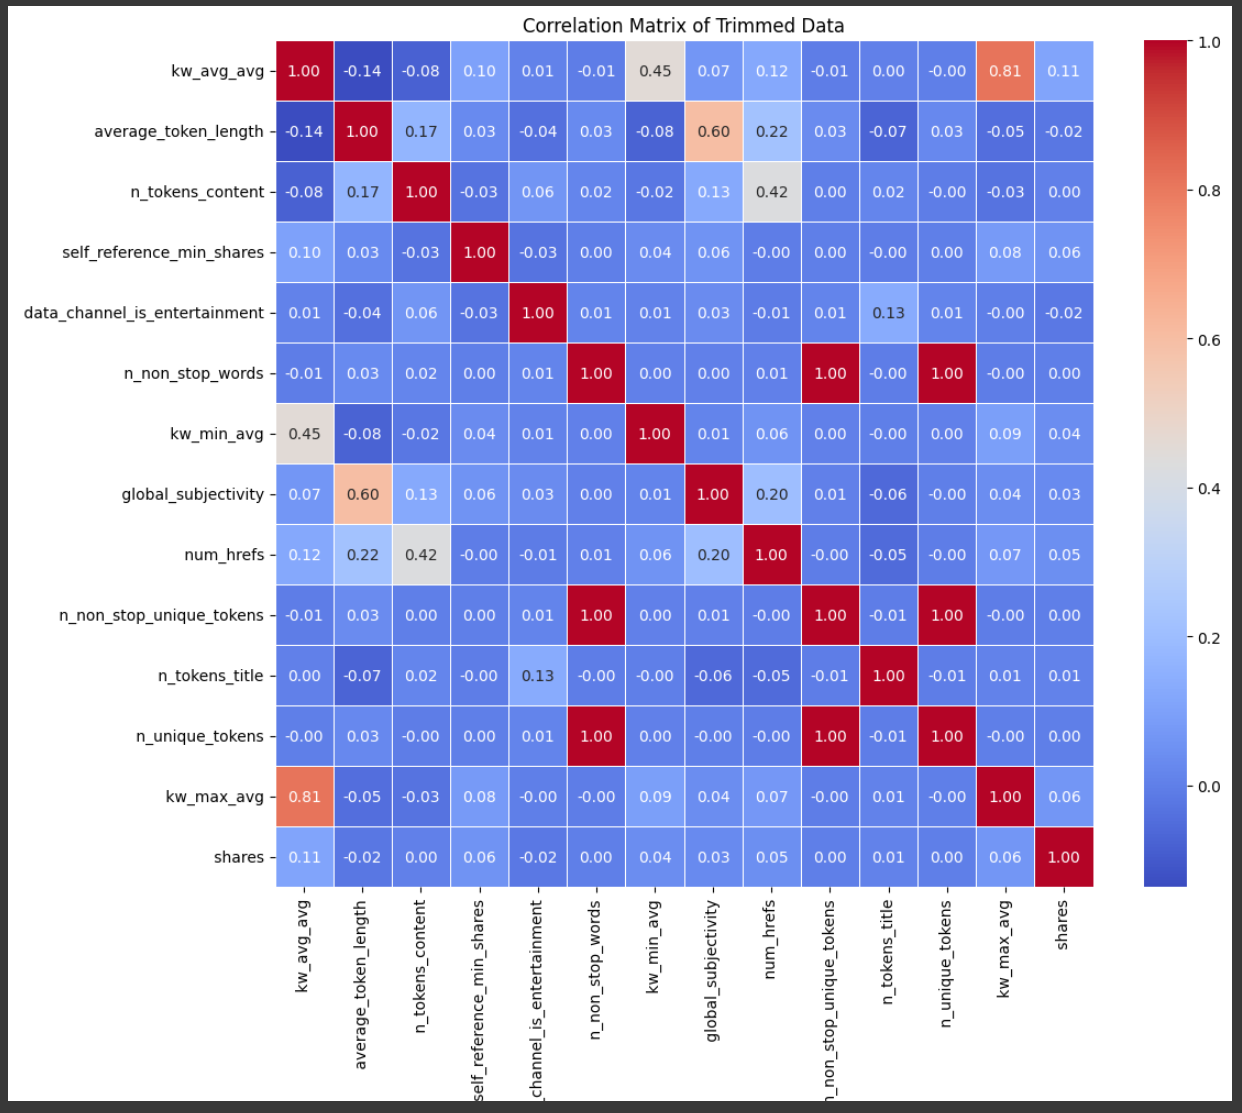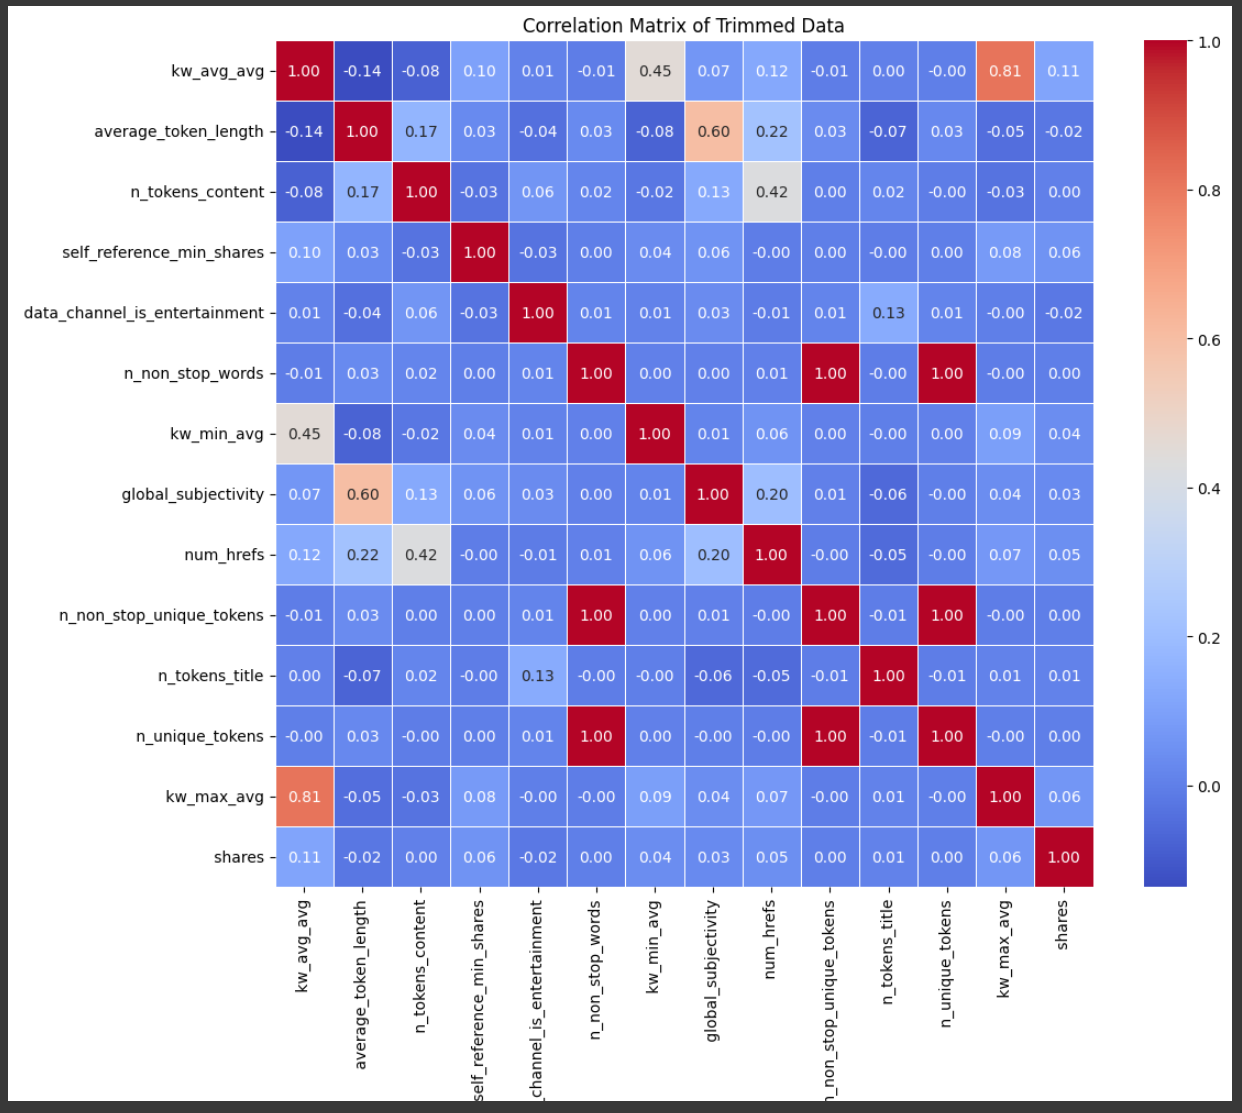)



---


## Linear Regression Modeling
> Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model?s usefulness for predicting future shares.

Original: 


- In-sample: 0.023

- Out-of-sample: -338


Our original model, without any cleaning, is VERY overfit with 57 features.. A negative R-squared indicates that we would have been better off with using our observed mean as a predictor, rather than minimizing our residuals. Evidently, using every variable as a predictor will mislead our data very poorly, so this model would not be appropriate in any way to predict shares. 


Stepwise:

- In-sample: 0.020
- Out-of-sample: 0.026

Our stepwise algorithm shaved our significant predictors to:


- N_tokens_title

- Num_hrefs

- Average_token_length

- Data_channel_is_entertainment

- Kw_min_avg

- Kw_max_avg

- Kw_avg_avg

- self_reference_min_shares 

- global_subjectivity


The stepwise model uses a simple analysis of p-values to find significant predictors. This model cut our predictor variables to just under 16% of our features, significantly reducing overfitting and leading to an effective model. Most likely, our R^2 value will be lower in out-of-sample, but sometimes the way that the train/test splits we can end up with a better fit out-of-sample. This would be an effective model to use in our context, as we can use these predictors to find a reasonable prediction for the number of shares we can get. 







LASSO Linear Regression:

Out-of-sample: -0.0177


Our Linear Regression with LASSO Regression is also ineffective out-of-sample. With a negative R^2 value OOS, we can determine that this fitting of our LASSO model would not work to predict future shares.



Since our Stepwise is the only effective out-of-sample model, we can look at some of the more significant predictors. Keyword count averages are a significant feature, as well as the number of href’s (links) to other sites. Additionally, the channel in which the article is featured on plays a significant role on whether it gets shared, specifically if it is an entertainment channel or not.


---

## Regression Tree Modeling
> Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the models usefulness for predicting future shares.

Out of sample metrics:
- Mean Squared Error: 181678178.1970393
- R-squared: -0.5055557816868557

We made the model using cost complexity analysis, and included a max depth so the model wouldn't run forever. However, because of the complexity of the model, it likely underfit. Because of the difficulty of the data set, a decision tree should be avoided because it lacks the ability to fully caputre the data. This is reflected by the r-squared score, which suggests that our model actually is misguided about accurately reflecting our model. Additionally, the MSE is super high, suggesting that individual predictions are usually very far away from the actual result. Thus, this model isn't very useful.

Out of Sample Metrics for Random Forest:
- Mean Squared Error: 116258709.44739127
- R-squared: 0.036571293718396514

Not surprisingly, the Random Forest performed a lot better. We used n_jobs to speed up the process so we could simulate a more complete tree. However, because of time restraints, we couldn't leave it running all day long. If we wanted better results, we would use more trees than we did (we used about 30, and do a grid search to find the best parameters). This being said, the tree is a lot worse than the forest with no other changes made, which shows that this is going in the right direction. While the results are still lousy, it wouldn't make sense to use this model as is, as the r2 score only accounts for about 3 percent of the out of sample which means it doesn't generalize well. We would want to build more into the model before using it to predict with any reasonable amout of confidence. 

---


## Conclusion!
> Compare each models predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in
your technical report that addresses Mashable?s business concerns and presents your
final model along with your confidence in its predictions.

*Josh stuff here*




# EDA
Brought to you by Adam

In [1]:
%%capture
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_news_popularity = fetch_ucirepo(id=332)

# data (as pandas dataframes)
X = online_news_popularity.data.features
y = online_news_popularity.data.targets

# metadata
print(online_news_popularity.metadata)

# variable information
print(online_news_popularity.variables)


{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

In [3]:
online_news_popularity.variables

,name,role,type,demographic,description,units,missing_values
0,url,ID,Categorical,None,None,None,no
1,timedelta,Other,Continuous,None,None,None,no
2,n_tokens_title,Feature,Continuous,None,None,None,no
3,n_tokens_content,Feature,Continuous,None,None,None,no
4,n_unique_tokens,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
56,title_subjectivity,Feature,Continuous,None,None,None,no
57,title_sentiment_polarity,Feature,Continuous,None,None,None,no
58,abs_title_subjectivity,Feature,Continuous,None,None,None,no
59,abs_title_sentiment_polarity,Feature,Continuous,None,None,None,no


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: ylabel='Frequency'>

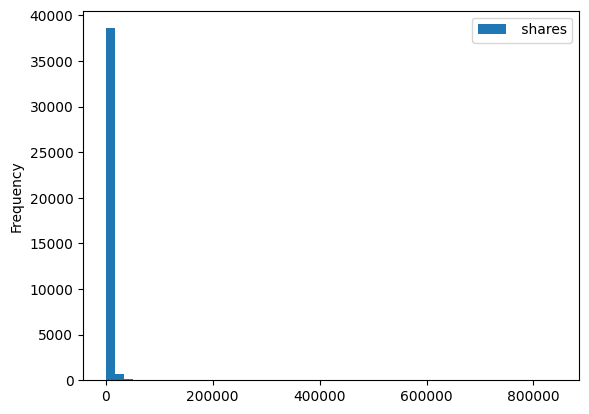

In [5]:
y.plot(kind = "hist", bins = 50)

<Axes: ylabel='Frequency'>

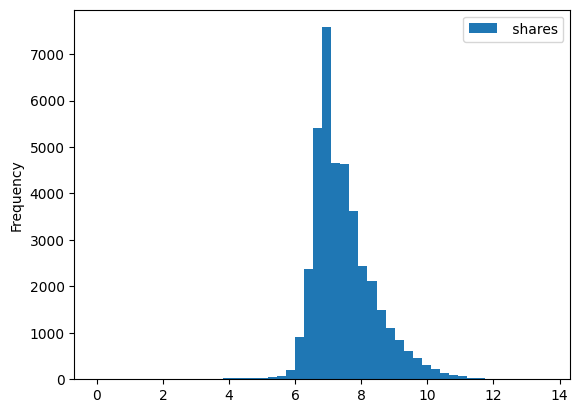

In [6]:
y_log = np.log(y)
y_log.plot(kind = "hist", bins = 50)

In [7]:
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [8]:
X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


## Build a stats models

In [11]:
import statsmodels.api as sm

def create_and_fit_model(X, y):
    """
    Creates and fits a statsmodels OLS regression model.

    Parameters:
    X (pd.DataFrame or np.ndarray): Feature matrix (independent variables).
    y (pd.Series or np.ndarray): Target vector (dependent variable).

    Returns:
    sm.regression.linear_model.RegressionResultsWrapper: Fitted statsmodels model.
    """
    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)

    # Create the OLS model
    model = sm.OLS(y, X_with_const)

    # Fit the model
    fitted_model = model.fit()

    return fitted_model



In [12]:
X = pd.get_dummies(X, drop_first = True)

In [13]:
initial_model = create_and_fit_model(X, y)

In [14]:
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.71
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          8.49e-158
Time:                        12:42:10   Log-Likelihood:            -4.2690e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39587   BIC:                         8.544e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -1.5e+05   5.21e+06     -0.029      0.977   -1.04e+07    1.01e+07
 n_tokens_title                   89.8590     28.671      3.134      0.002      33.662     146.056
 n_tokens_content                  0.5936      0.224      2.656      0.008       0.156       1.032
 n_unique_tokens                3985.3309   1918.563      2.077      0.038     224.902    7745.760
 n_non_stop_words              -1483.5441   5910.913     -0.251      0.802   -1.31e+04    1.01e+04
 n_non_stop_unique_tokens      -1640.5107   1629.463     -1.007      0.314   -4834.297    1553.276
 num_hrefs                        26.5413      6.706      3.958      0.000      13.397      39.686
 num_self_hrefs                  -57.6437     17.818     -3.235      0.001     -92.567     -22.720
 num_imgs                         11.8973      8.942      1.330      0.183      -5.629      29.424
 num_videos                        5.6446     15.751      0.358      0.720     -25.227      36.516
 average_token_length           -586.7289    242.856     -2.416      0.016   -1062.732    -110.726
 num_keywords                     49.4938     37.137      1.333      0.183     -23.295     122.282
 data_channel_is_lifestyle     -1050.0275    394.651     -2.661      0.008   -1823.553    -276.502
 data_channel_is_entertainment -1180.4985    255.195     -4.626      0.000   -1680.687    -680.310
 data_channel_is_bus            -802.3200    382.716     -2.096      0.036   -1552.452     -52.188
 data_channel_is_socmed         -602.9410    372.377     -1.619      0.105   -1332.809     126.927
 data_channel_is_tech           -550.9452    371.426     -1.483      0.138   -1278.948     177.058
 data_channel_is_world          -483.0775    376.363     -1.284      0.199   -1220.758     254.603
 kw_min_min                        2.2088      1.623      1.361      0.174      -0.973       5.391
 kw_max_min                        0.0872      0.050      1.739      0.082      -0.011       0.185
 kw_avg_min                       -0.3468      0.308     -1.127      0.260      -0.950       0.257
 kw_min_max                       -0.0021      0.001     -1.761      0.078      -0.004       0.000
 kw_max_max                       -0.0005      0.001     -0.890      0.373      -0.002       0.001
 kw_avg_max                       -0.0007      0.001     -0.867      0.386      -0.002       0.001
 kw_min_avg                       -0.3659      0.076     -4.836      0.000      -0.514      -0.218
 kw_max_avg                       -0.2026      0.025     -8.010      0.000      -0.252      -0.153
 kw_avg_avg                        1.6625      0.144     11.558      0.000       1.381       1.944
 self_reference_min_shares         0.0262      0.008      3.476      0.001       0.011       0.041
 self_referenc

In [15]:
import statsmodels.api as sm

def refine_model(model, X, y, p_value_threshold=0.05):
    """
    Refines a statsmodels OLS model by removing features with p-values greater than the threshold.

    Parameters:
    model (sm.regression.linear_model.RegressionResultsWrapper): Initial fitted statsmodels model.
    X (pd.DataFrame): Original feature matrix (independent variables).
    y (pd.Series or np.ndarray): Target vector (dependent variable).
    p_value_threshold (float): P-value threshold for feature inclusion. Default is 0.05.

    Returns:
    sm.regression.linear_model.RegressionResultsWrapper: Refined fitted statsmodels model.
    """
    # Add a constant to the feature matrix
    X_with_const = sm.add_constant(X)

    # Fit and refine the model iteratively
    while True:
        # Get the p-values from the current model
        p_values = model.pvalues

        # Exclude the intercept from removal
        p_values = p_values.drop('const', errors='ignore')

        # Find features with p-values greater than the threshold
        features_to_remove = p_values[p_values > p_value_threshold].index

        if features_to_remove.empty:
            # Stop if no features exceed the threshold
            break

        # Drop the features with high p-values from the dataset
        X_with_const = X_with_const.drop(columns=features_to_remove)

        # Refit the model with the reduced set of features
        model = sm.OLS(y, X_with_const).fit()

    return model


In [16]:
adj_model = refine_model(initial_model, X, y, 0.05)

In [17]:
adj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     89.20
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          2.74e-165
Time:                        12:42:11   Log-Likelihood:            -4.2697e+05
No. Observations:               39644   AIC:                         8.540e+05
Df Residuals:                   39634   BIC:                         8.540e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1095.0250    508.486     -2.153      0.031   -2091.670     -98.380
 n_tokens_title                   70.7767     27.687      2.556      0.011      16.509     125.045
 num_hrefs                        32.7149      5.334      6.134      0.000      22.261      43.169
 average_token_length           -443.8782     90.693     -4.894      0.000    -621.638    -266.118
 data_channel_is_entertainment  -634.1518    153.098     -4.142      0.000    -934.227    -334.077
 kw_min_avg                       -0.4863      0.067     -7.221      0.000      -0.618      -0.354
 kw_max_avg                       -0.1959      0.019    -10.048      0.000      -0.234      -0.158
 kw_avg_avg                        1.7679      0.103     17.133      0.000       1.566       1.970
 self_reference_min_shares         0.0262      0.003      8.886      0.000       0.020       0.032
 global_subjectivity            3457.4940    638.869      5.412      0.000    2205.295    4709.693
==============================================================================
Omnibus:                   108721.527   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5845590993.464
Skew:                          34.467   Prob(JB):                         0.00
Kurtosis:                    1882.920   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
adj_model.params.index

Index(['const', ' n_tokens_title', ' num_hrefs', ' average_token_length',
       ' data_channel_is_entertainment', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares', ' global_subjectivity'],
      dtype='object')

# Regression tree anaylsis

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
rf_tree = RandomForestRegressor(max_leaf_nodes=20)
d_tree = DecisionTreeRegressor(max_leaf_nodes=50)

In [21]:
d_tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50)

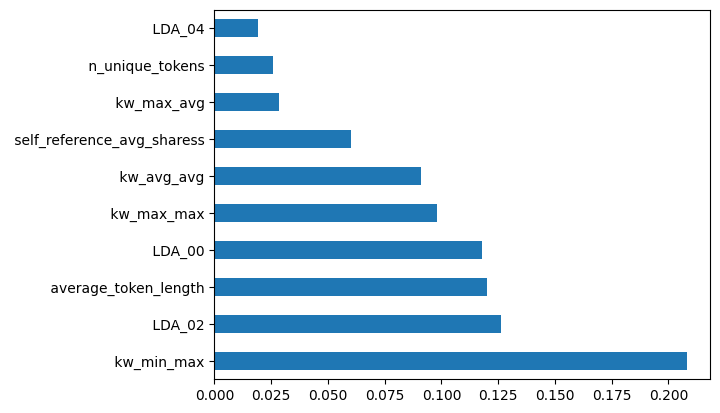

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'd_tree' and 'X' are defined from the previous code
feature_importances = pd.Series(d_tree.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [23]:
d_tree.score(X, y)

0.5758315301742647

In [24]:
feature_importances.head(5).index

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens'],
      dtype='object')

# Part 4 of EDA

In [25]:
#Our significant Feature Choice
sig_features = list(set([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens']).union([' n_tokens_title', ' num_hrefs', ' average_token_length',
       ' data_channel_is_entertainment', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares', ' global_subjectivity']))

# for i in range(0, len(sig_features)):
#   sig_features[i] = sig_features[i].replace(" ", "")


In [26]:
sig_features

[' n_unique_tokens',
 ' self_reference_min_shares',
 ' average_token_length',
 ' kw_max_avg',
 ' global_subjectivity',
 ' n_non_stop_unique_tokens',
 ' n_non_stop_words',
 ' n_tokens_content',
 ' kw_min_avg',
 ' n_tokens_title',
 ' data_channel_is_entertainment',
 ' num_hrefs',
 ' kw_avg_avg']

In [27]:
combined_data = pd.concat([X, y], axis=1)

In [28]:
combined_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [29]:
sig_features.append(" shares")
sig_features

[' n_unique_tokens',
 ' self_reference_min_shares',
 ' average_token_length',
 ' kw_max_avg',
 ' global_subjectivity',
 ' n_non_stop_unique_tokens',
 ' n_non_stop_words',
 ' n_tokens_content',
 ' kw_min_avg',
 ' n_tokens_title',
 ' data_channel_is_entertainment',
 ' num_hrefs',
 ' kw_avg_avg',
 ' shares']

In [30]:
combined_data.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [31]:
trimmed_data = combined_data[sig_features]

In [32]:
trimmed_data

,n_unique_tokens,self_reference_min_shares,average_token_length,kw_max_avg,global_subjectivity,n_non_stop_unique_tokens,n_non_stop_words,n_tokens_content,kw_min_avg,n_tokens_title,data_channel_is_entertainment,num_hrefs,kw_avg_avg,shares
0,0.663594,496.0,4.680365,0.000000,0.521617,0.815385,1.0,219.0,0.000000,12.0,1.0,4.0,0.000000,593
1,0.604743,0.0,4.913725,0.000000,0.341246,0.791946,1.0,255.0,0.000000,9.0,0.0,3.0,0.000000,711
2,0.575130,918.0,4.393365,0.000000,0.702222,0.663866,1.0,211.0,0.000000,9.0,0.0,3.0,0.000000,1500
3,0.503788,0.0,4.404896,0.000000,0.429850,0.665635,1.0,531.0,0.000000,9.0,1.0,9.0,0.000000,1200
4,0.415646,545.0,4.682836,0.000000,0.513502,0.540890,1.0,1072.0,0.000000,13.0,0.0,19.0,0.000000,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.529052,11400.0,4.523121,4004.342857,0.482679,0.684783,1.0,346.0,2514.742857,11.0,0.0,9.0,3031.115764,1800
39640,0.696296,2100.0,4.405488,5470.168651,0.564374,0.885057,1.0,328.0,1664.267857,12.0,0.0,9.0,3411.660830,1900
39641,0.516355,1400.0,5.076923,6880.687034,0.510296,0.644128,1.0,442.0,1753.882353,10.0,0.0,24.0,4206.439195,1900
39642,0.539493,452.0,4.975073,3384.316871,0.358578,0.692661,1.0,682.0,0.000000,6.0,0.0,10.0,1777.895883,1100


<Axes: >

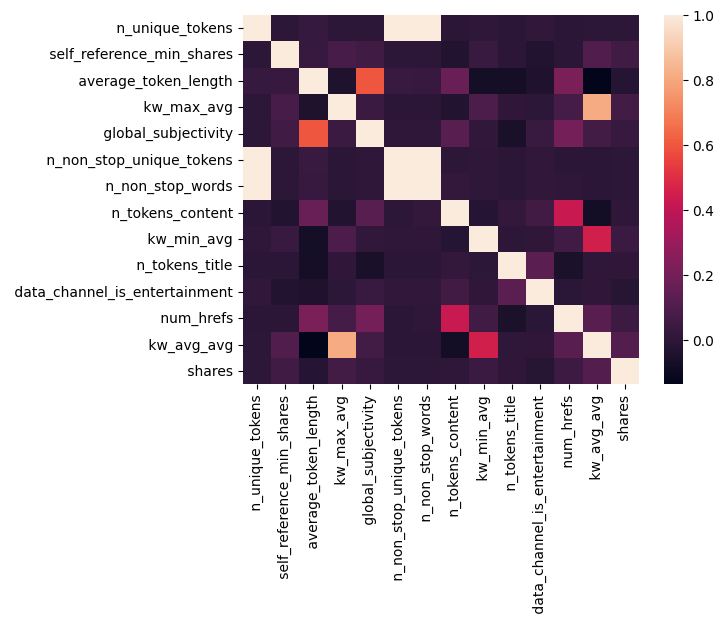

In [33]:
sns.heatmap(trimmed_data.corr())

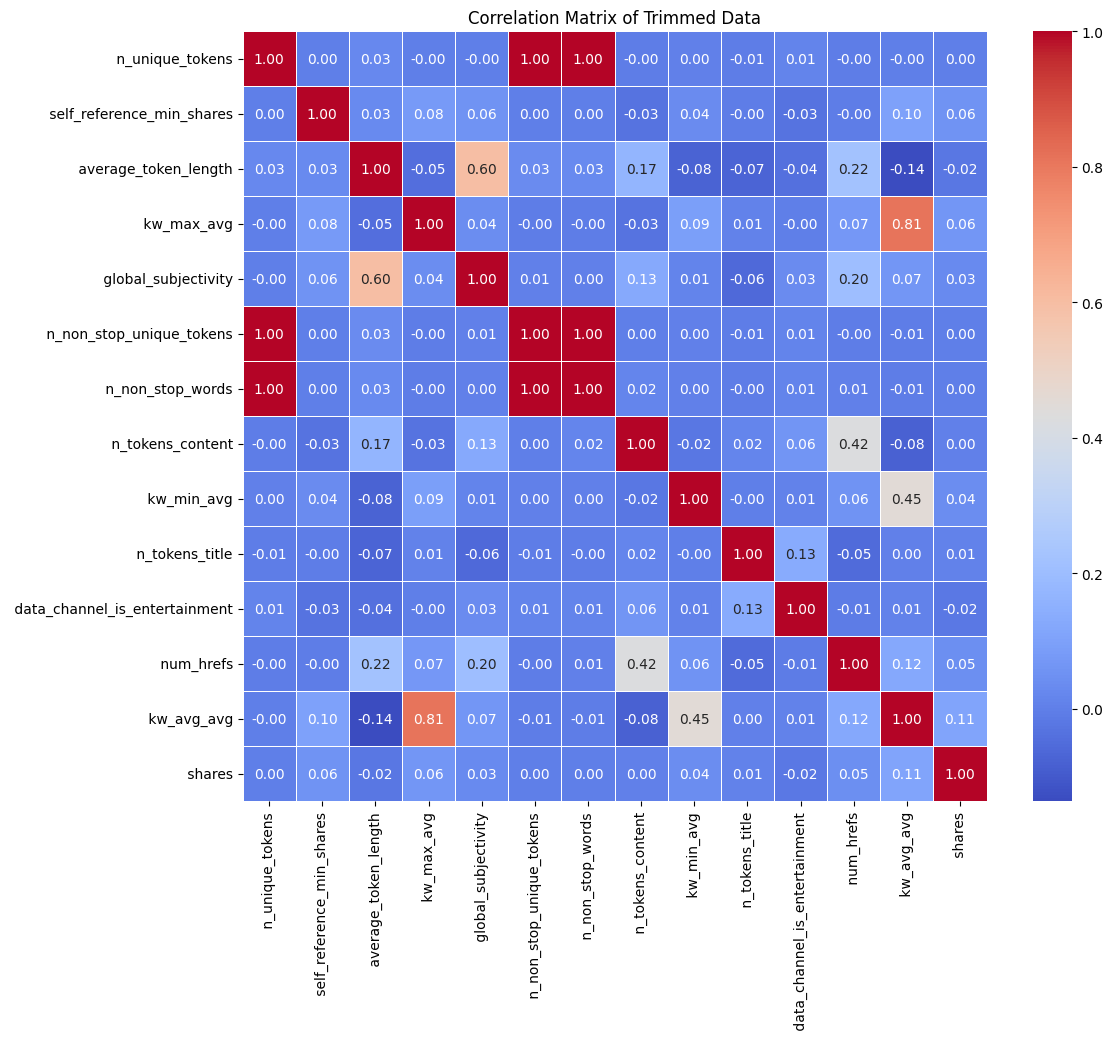

In [34]:
plt.figure(figsize=(12, 10)) # Adjust the figure size for better readability
sns.heatmap(trimmed_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Trimmed Data') # Add a title to the plot
plt.show()

- Wrap up EDA

# Linear Regression Modeling

In [35]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined from the previous code
X_train, X_test, y_train, y_test = train_test_split(trimmed_data, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

In [36]:
# prompt: 2. Explore transformations of the target and other variables. by creating a function to do this

import pandas as pd
import numpy as np

def explore_transformations(df, column_name, transformations):
    """
    Explores different transformations of a specified column in a DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column to transform.
        transformations: A dictionary where keys are transformation names and
                         values are functions that perform the transformation.

    Returns:
        A DataFrame with the original column and its transformed versions.
    """

    transformed_df = pd.DataFrame()
    transformed_df[column_name] = df[column_name]

    for transformation_name, transformation_func in transformations.items():
        try:
            transformed_df[transformation_name] = transformation_func(df[column_name])
        except (ValueError, TypeError) as e:
            print(f"Error applying transformation '{transformation_name}' to '{column_name}': {e}")
            transformed_df[transformation_name] = np.nan  # Or handle the error differently

    return transformed_df

# Example Usage (assuming 'y' is your target variable and 'X' has other features):
transformations_to_apply = {
    'log_transform': np.log1p,  # Log transformation (add 1 to avoid log(0))
    'sqrt_transform': np.sqrt,    # Square root transformation
    'inverse': lambda x: 1/x, # Reciprocal transformation
    # Add other transformations as needed
}




In [37]:
transformed_y = explore_transformations(pd.DataFrame(y), ' shares', transformations_to_apply)
transformed_y.head()

,shares,log_transform,sqrt_transform,inverse
0,593,6.386879,24.351591,0.001686
1,711,6.568078,26.664583,0.001406
2,1500,7.313887,38.729833,0.000667
3,1200,7.090910,34.641016,0.000833
4,505,6.226537,22.472205,0.001980


In [38]:
transformed_n_tokens = explore_transformations(X, ' n_tokens_content', transformations_to_apply)
transformed_n_tokens.head()

,n_tokens_content,log_transform,sqrt_transform,inverse
0,219.0,5.393628,14.798649,0.004566
1,255.0,5.545177,15.968719,0.003922
2,211.0,5.356586,14.525839,0.004739
3,531.0,6.276643,23.043437,0.001883
4,1072.0,6.978214,32.741411,0.000933


In [39]:
higher_order = X.copy()

In [40]:
for columns in higher_order.columns:
  df = explore_transformations(higher_order, ' n_tokens_content', transformations_to_apply)

  for column in df.columns[1:]:
    higher_order[columns + "_" + column] = df[column]


In [41]:
higher_order

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,title_subjectivity_inverse,title_sentiment_polarity_log_transform,title_sentiment_polarity_sqrt_transform,title_sentiment_polarity_inverse,abs_title_subjectivity_log_transform,abs_title_subjectivity_sqrt_transform,abs_title_subjectivity_inverse,abs_title_sentiment_polarity_log_transform,abs_title_sentiment_polarity_sqrt_transform,abs_title_sentiment_polarity_inverse
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.004566,5.393628,14.798649,0.004566,5.393628,14.798649,0.004566,5.393628,14.798649,0.004566
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.003922,5.545177,15.968719,0.003922,5.545177,15.968719,0.003922,5.545177,15.968719,0.003922
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.004739,5.356586,14.525839,0.004739,5.356586,14.525839,0.004739,5.356586,14.525839,0.004739
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.001883,6.276643,23.043437,0.001883,6.276643,23.043437,0.001883,6.276643,23.043437,0.001883
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.000933,6.978214,32.741411,0.000933,6.978214,32.741411,0.000933,6.978214,32.741411,0.000933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.002890,5.849325,18.601075,0.002890,5.849325,18.601075,0.002890,5.849325,18.601075,0.002890
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.003049,5.796058,18.110770,0.003049,5.796058,18.110770,0.003049,5.796058,18.110770,0.003049
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.002262,6.093570,21.023796,0.002262,6.093570,21.023796,0.002262,6.093570,21.023796,0.002262
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.001466,6.526495,26.115130,0.001466,6.526495,26.115130,0.001466,6.526495,26.115130,0.001466


In [42]:
for i in range(len(X.columns)):
  for j in range(i + 1, len(X.columns)):
      higher_order[f"{X.columns[i]}_{X.columns[j]}"] = higher_order[X.columns[i]] * higher_order[X.columns[j]]
higher_order.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_negative_polarity_ title_subjectivity,max_negative_polarity_ title_sentiment_polarity,max_negative_polarity_ abs_title_subjectivity,max_negative_polarity_ abs_title_sentiment_polarity,title_subjectivity_ title_sentiment_polarity,title_subjectivity_ abs_title_subjectivity,title_subjectivity_ abs_title_sentiment_polarity,title_sentiment_polarity_ abs_title_subjectivity,title_sentiment_polarity_ abs_title_sentiment_polarity,abs_title_subjectivity_ abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.100000,0.037500,-0.000000,-0.037500,-0.093750,0.000000,0.093750,-0.000000,-0.035156,0.000000
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.000000,-0.000000,-0.050000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.000000,-0.000000,-0.066667,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.000000,-0.000000,-0.083333,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.022727,-0.006818,-0.002273,-0.006818,0.061983,0.020661,0.061983,0.006198,0.018595,0.006198


In [43]:
higher_order = higher_order.fillna(0)
higher_order = higher_order.replace([np.inf, -np.inf], 0)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(higher_order, y, test_size=0.2, random_state=42)

In [45]:
model2 = create_and_fit_model(X_train, y_train)

In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     3.588
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          6.14e-240
Time:                        12:42:24   Log-Likelihood:            -3.4074e+05
No. Observations:               31715   AIC:                         6.833e+05
Df Residuals:                   30819   BIC:                         6.908e+05
Df Model:                         895                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                        -2669.0320   5939.087     -0.449      0.653   -1.43e+04    8971.823
 n_tokens_title                                                405.6774    306.408      1.324      0.186    -194.895    1006.250
 n_tokens_content                                               -8.0966     26.145     -0.310      0.757     -59.343      43.150
 n_unique_tokens                                             -8271.6611    1.7e+04     -0.487      0.626   -4.15e+04     2.5e+04
 n_non_stop_words                                            -5034.2514   8547.899     -0.589      0.556   -2.18e+04    1.17e+04
 n_non_stop_unique_tokens                                     1.127e+04   1.42e+04      0.793      0.428   -1.66e+04    3.91e+04
 num_hrefs                                                     155.6138     73.963      2.104      0.035      10.644     300.584
 num_self_hrefs                                               -455.3952    248.727     -1.831      0.067    -942.909      32.119
 num_imgs                                                      126.6175    106.464      1.189      0.234     -82.056     335.291
 num_videos                                                    -95.1429    287.648     -0.331      0.741    -658.945     468.659
 average_token_length                                          808.5164   1382.816      0.585      0.559   -1901.859    3518.892
 num_keywords                                                 -159.0114    415.774     -0.382      0.702    -973.945     655.922
 data_channel_is_lifestyle                                    1663.9002   4442.971      0.375      0.708   -7044.504    1.04e+04
 data_channel_is_entertainment                               -1643.8794   2651.043     -0.620      0.535   -6840.033    3552.274
 data_channel_is_bus                                           842.3591   4403.385      0.191      0.848   -7788.456    9473.174
 data_channel_is_socmed                                       2176.0963   4641.844      0.469      0.639   -6922.108    1.13e+04
 data_channel_is_tech                                         3750.6634   4087.698      0.918      0.359   -4261.393    1.18e+04
 data_channel_is_world                                        2413.2485   3909.449      0.617      0.537   -5249.431    1.01e+04
 kw_min_min                                                     15.2341     20.775      0.733      0.463     -25.487      55.955
 kw_max_min                                                      7.1812      1.609      4.464      0.000       4.028      10.334
 kw_avg_min                                                    -19.1566      6.455     -2.968      0.003     -31.810

In [47]:
refinedModel2 = refine_model(model2, higher_order, y)

In [48]:
refinedModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.21
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.08e-203
Time:                        12:42:27   Log-Likelihood:            -4.2682e+05
No. Observations:               39644   AIC:                         8.537e+05
Df Residuals:                   39608   BIC:                         8.540e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2697.6690    214.308     12.588      0.000    2277.621    3117.717
 kw_max_min                                                0.8077      0.156      5.190      0.000       0.503       1.113
 kw_avg_min                                               -2.1314      0.428     -4.981      0.000      -2.970      -1.293
 n_tokens_title_ data_channel_is_bus                    -138.7899     28.977     -4.790      0.000    -195.585     -81.995
 n_tokens_title_ max_negative_polarity                  -517.4451     86.487     -5.983      0.000    -686.962    -347.928
 n_tokens_content_ num_keywords                            0.1169      0.035      3.368      0.001       0.049       0.185
 n_tokens_content_ data_channel_is_tech                    0.9155      0.274      3.346      0.001       0.379       1.452
 n_tokens_content_ min_positive_polarity                  -8.2171      2.293     -3.583      0.000     -12.712      -3.722
 n_tokens_content_ avg_negative_polarity                  -2.0267      0.917     -2.209      0.027      -3.825      -0.229
 n_tokens_content_ max_negative_polarity                   8.4921      2.727      3.114      0.002       3.147      13.837
 n_tokens_content_ abs_title_subjectivity                 -0.8683      0.421     -2.064      0.039      -1.693      -0.044
 num_hrefs_ weekday_is_wednesday                          77.3767     13.030      5.938      0.000      51.837     102.916
 num_self_hrefs_ kw_avg_min                                0.2326      0.030      7.711      0.000       0.174       0.292
 num_self_hrefs_ weekday_is_wednesday                   -149.7000     42.342     -3.536      0.000    -232.691     -66.709
 num_self_hrefs_ min_negative_polarity                   119.2203     27.102      4.399      0.000      66.099     172.341
 num_imgs_ data_channel_is_tech                         -153.3333     36.692     -4.179      0.000    -225.250     -81.417
 num_imgs_ LDA_04                                        161.4864     39.648      4.073      0.000      83.775     239.197
 num_videos_ LDA_04                                      388.3447    108.722      3.572      0.000     175.246     601.443
 average_token_length_ title_sentiment_polarity         -261.4260    113.174     -2.310      0.021    -483.250     -39.602
 num_keywords_ kw_max_min                                 -0.0688      0.013     -5.225      0.000      -0.095      -0.043
 data_channel_is_bus_ LDA_03                            6804.0374   1560.707      4.360      0.000    3745.014    9863.061
 data_channel_is_bus_ min_negative_polarity            -2371.6622    515.325     -4.602      0.000   -3381.711   -1361.614
 kw_min_

# LASSO REGRESSION

In [49]:
X_train, X_test, y_train, y_test = train_test_split(higher_order, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# param_grid = {'alpha': [0.01, 0.1, 1]}
# lasso = GridSearchCV(Lasso(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=2)
# lasso.fit(X_train, y_train)

""" The Best alpha value was 0.1""""

In [ ]:
from sklearn.metrics import mean_squared_error

# best_alpha = lasso.best_params_['alpha']
# print("Best Alpha from GridSearchCV:", best_alpha)

lasso_best = Lasso(alpha=0.1, random_state=42)
lasso_best.fit(X_train, y_train)

y_best_pred = lasso_best.predict(X_test)
best_mse = mean_squared_error(y_test, y_best_pred)
print("Mean Squared Error with Best Alpha:", best_mse)
print("Best Lasso Coefficients:", lasso_best.coef_)

Mean Squared Error with Best Alpha: 122819700.34680772
Best Lasso Coefficients: [ 3.32102701e+02 -9.52886813e-01 -8.92406021e+00 ... -6.11348082e+03
 -1.67041004e+03  7.07481405e+03]


In [58]:
from sklearn.metrics import mean_squared_error

y_best_pred = lasso.predict(X_train)
best_mse = mean_squared_error(y_best_pred, y_train)
r2_score = lasso.score(X_train, y_train)
print("(In sample) R-squared:", r2_score)
print("(In sample) Mean Squared Error with Best Alpha:", best_mse)

(In sample) R-squared: 0.08909866620862061
(In sample) Mean Squared Error with Best Alpha: 126441239.23510723


# Regression Tree

In [59]:
regression_tree = DecisionTreeRegressor(random_state=42, max_depth=8, ccp_alpha=.043)
regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 181678178.1970393
R-squared: -0.5055557816868557


In [60]:
regression_forest = RandomForestRegressor(n_estimators = 20, random_state=42, max_depth=8, ccp_alpha=.043, n_jobs = -1)
regression_forest.fit(X_train, y_train)

y_pred = regression_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 116258709.44739127
R-squared: 0.036571293718396514


In [ ]:
def calculate_out_of_sample_r_squared(model, X_test, y_test):
    try:
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(r2)
    except:
            X_test = sm.add_constant(X_test)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            print(r2)


In [63]:
len(X_test), len(y_test)

(7929, 7929)

In [75]:
print("Linear regression: ", end="")
calculate_out_of_sample_r_squared(model2, X_test, y_test)
print("Lineaer regression with LASSO regression: ", end="")
calculate_out_of_sample_r_squared(lasso, X_test, y_test)
print("Linear regression with Stepwise evaluation: 0.026")
print("Regression Tree model: ", end="")
calculate_out_of_sample_r_squared(regression_tree, X_test, y_test)
print("Random Forest model: ", end="")
calculate_out_of_sample_r_squared(regression_forest, X_test, y_test)

Linear regression: -338.0941556336247
Lineaer regression with LASSO regression: -0.017799230470249006
Linear regression with Stepwise evaluation: 0.026
Regression Tree model: -0.5055557816868557
Random Forest model: 0.036571293718396514


# OUR REPORT
- Its at the top
```
`# This is formatted as code`
```

